<a href="https://colab.research.google.com/github/matsunagalab/md_analysis/blob/main/md_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mdtraj

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.7-cp310-cp310-linux_x86_64.whl size=7958404 sha256=c83b6e9ad69b9dbc09929c8bf23de965485c620e089fb24a7bdebed9c9b16f0c
  Stored in directory: /root/.cache/pip/wheels/ad/55/84/3b6abc1f4021160d8b6b876a9ed69148344f57bc443c1d2dd3
Successfully built mdtraj


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/mdtraj/core/trajectory.py:438: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


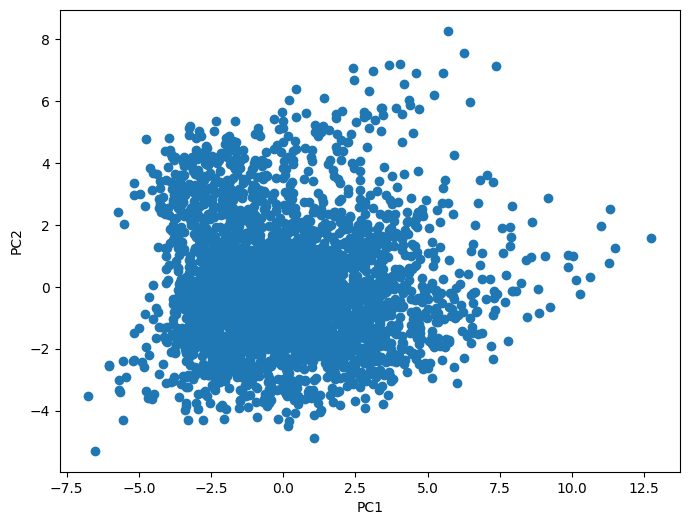

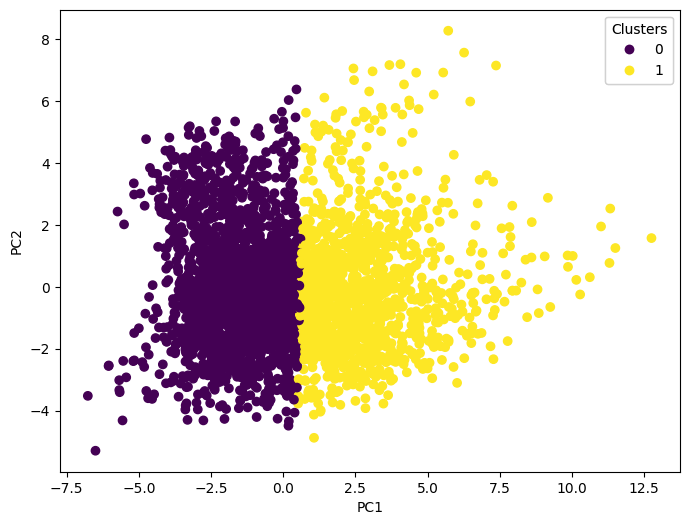

In [ ]:
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your files on your Google Drive
path = '/content/drive/MyDrive/data/lysozyme_wildtype/'
#path = '/content/drive/MyDrive/data/lysozyme_mutant/'

# Load the trajectory
traj = md.load(path + 'prot_superposed.h5')

# Get the Cartesian coordinates and reshape them into a 2D array
coordinates = traj.xyz.reshape(traj.n_frames, -1)

# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
pca_coordinates = pca.fit_transform(coordinates)

# Perform KMeans clustering in the PC1-PC2 space
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(pca_coordinates)

# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Create a scatter plot of the PC1-PC2 space, color-coded by cluster
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.show()